# Natural Language Processing Project

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [2]:
# Read the yelp.csv file and set it as a dataframe called yelp.

yelp = pd.read_csv('yelp.csv')

In [3]:
# Check the head, info , and describe methods on yelp.

yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
# Create a new column called "text length" which is the number of words in the text column.

yelp['text length'] = yelp['text'].apply(len)

In [7]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


## EDA

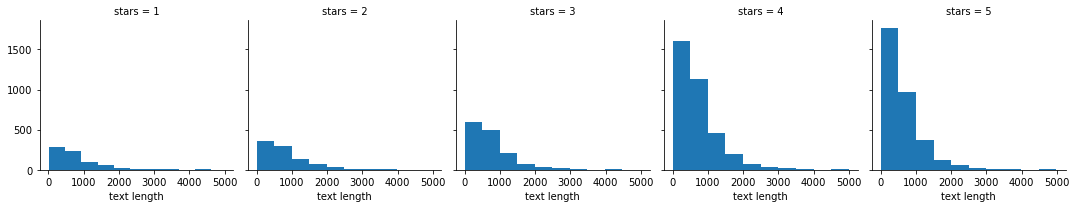

In [8]:
# Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this

g = sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='stars', ylabel='text length'>

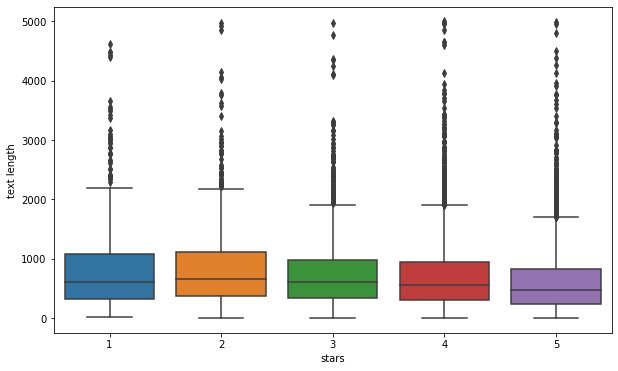

In [10]:
# Create a boxplot of text length for each star category.

plt.figure(figsize=(10,6))
sns.boxplot(x='stars',y='text length',data=yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

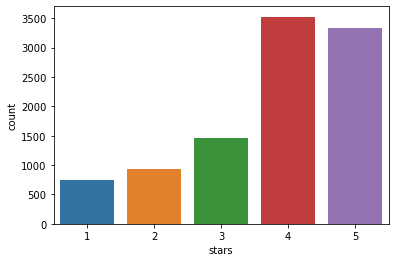

In [11]:
# Create a countplot of the number of occurrences for each type of star rating.

sns.countplot(x='stars',data=yelp)

In [13]:
# Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:

yelp_star = yelp.groupby('stars').mean()

In [14]:
yelp_star

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [16]:
# Use the corr() method on that groupby dataframe to produce this dataframe:

yelp_corr = yelp_star.corr()

In [17]:
yelp_corr

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

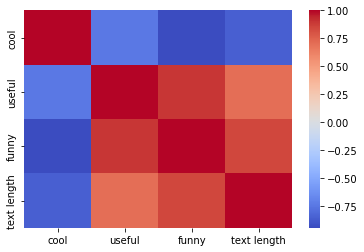

In [22]:
# Then use seaborn to create a heatmap based off that .corr() dataframe:

sns.heatmap(yelp_corr,cmap='coolwarm')

## NLP Classification Task

In [28]:
# Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [40]:
# Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)

X = yelp_class['text']
y = yelp_class['stars']

In [41]:
# Import CountVectorizer and create a CountVectorizer object.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [42]:
# Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.

X = cv.fit_transform(X)

## Train Test Split

In [43]:
# Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101

from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

In [45]:
# Import MultinomialNB and create an instance of the estimator and call is nb

from sklearn.naive_bayes import MultinomialNB

In [46]:
nb = MultinomialNB()

In [47]:
# Now fit nb using the training data.

nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

In [48]:
# Use the predict method off of nb to predict labels from X_test.

predictions = nb.predict(X_test)

In [49]:
# Create a confusion matrix and classification report using these predictions and y_test

from sklearn.metrics import confusion_matrix,classification_report

In [50]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## Using Text Processing

In [51]:
# Import TfidfTransformer from sklearn.

from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
# Import Pipeline from sklearn.

from sklearn.pipeline import make_pipeline

In [54]:
# Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()

pipeline = make_pipeline(CountVectorizer(),TfidfTransformer(),MultinomialNB())

## Using the Pipeline

In [55]:
# Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the 
# CountVectorized version. What we need is just the text

## Train Test Split

In [56]:
# Redo the train test split on the yelp_class object.

X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
# Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text 
# and labels

pipeline.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB())])

## Predictions and Evaluation

In [58]:
# Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.

pipe_pred = pipeline.predict(X_test)

In [59]:
print(confusion_matrix(y_test,pipe_pred))
print('\n')
print(classification_report(y_test,pipe_pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
pipeline_new = make_pipeline(CountVectorizer(),MultinomialNB())

In [61]:
pipeline_new.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [62]:
new_pred = pipeline_new.predict(X_test)

In [63]:
print(confusion_matrix(y_test,new_pred))
print('\n')
print(classification_report(y_test,new_pred))

[[155  73]
 [ 15 983]]


              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

